# 1.1) EDA on Titanic dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### i) First we can proceed with looking for null values in our dataset and can perform the following:
        1) Drop the feature, if null values are much more compared to non-null values in the feature.
        2) Fill the null values by the average values of the other records or by exploring the data and predicitng value.
        3) Drop the records containing the null values, if there are very less records with null values.

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

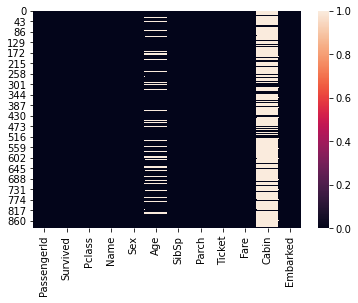

In [7]:
sns.heatmap(data.isnull())

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### ii) It can be observed that there are 687 null values in Cabin column out of 891 total entries. Therefore we can drop of the Cabin feature as null values are much large compared to non-null values

In [9]:
data.drop('Cabin',axis=1 ,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<AxesSubplot:>

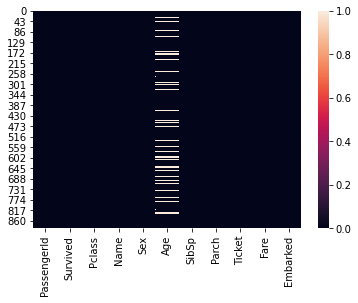

In [11]:
sns.heatmap(data.isnull())

In [12]:
data['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [13]:
data[data['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [14]:
data[(data['Age'].notnull()) & (data['Pclass']==1)]['Age'].mean()

38.233440860215055

### iii) Boxplot for Age vs Pclass

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

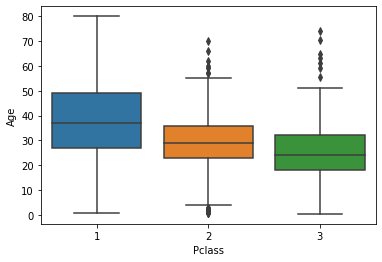

In [15]:
sns.boxplot(x='Pclass',y='Age',data=data)

### iv) Replacing null values of Age in different Pclass with their particular mean value

In [16]:
def calc_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [17]:
data['Age'] = data[['Age','Pclass']].apply(calc_age,axis=1)

<AxesSubplot:>

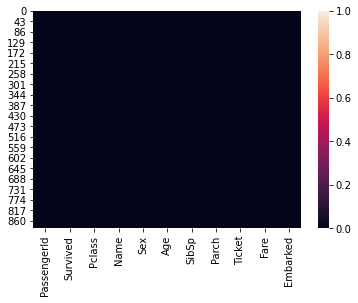

In [18]:
sns.heatmap(data.isnull())

### vi) Dropping 2 records with null Embarked values

In [19]:
data['Embarked'].isnull().count()
data.dropna(inplace = True)

### v) Getting dummy variable for Sex and Embarked column

In [20]:
data = pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)

In [21]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

#  1.2) Selecting important features

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_male     889 non-null    uint8  
 8   Embarked_Q   889 non-null    uint8  
 9   Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [23]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Splitting data in train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survived','PassengerId'],axis=1), data['Survived'],test_size=0.3)

# 1.3) Tune Decision Tree Model and Plot Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [27]:
DTModel = DecisionTreeClassifier()
DTModel.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
Predictions = DTModel.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,Predictions)
accuracy

0.8202247191011236

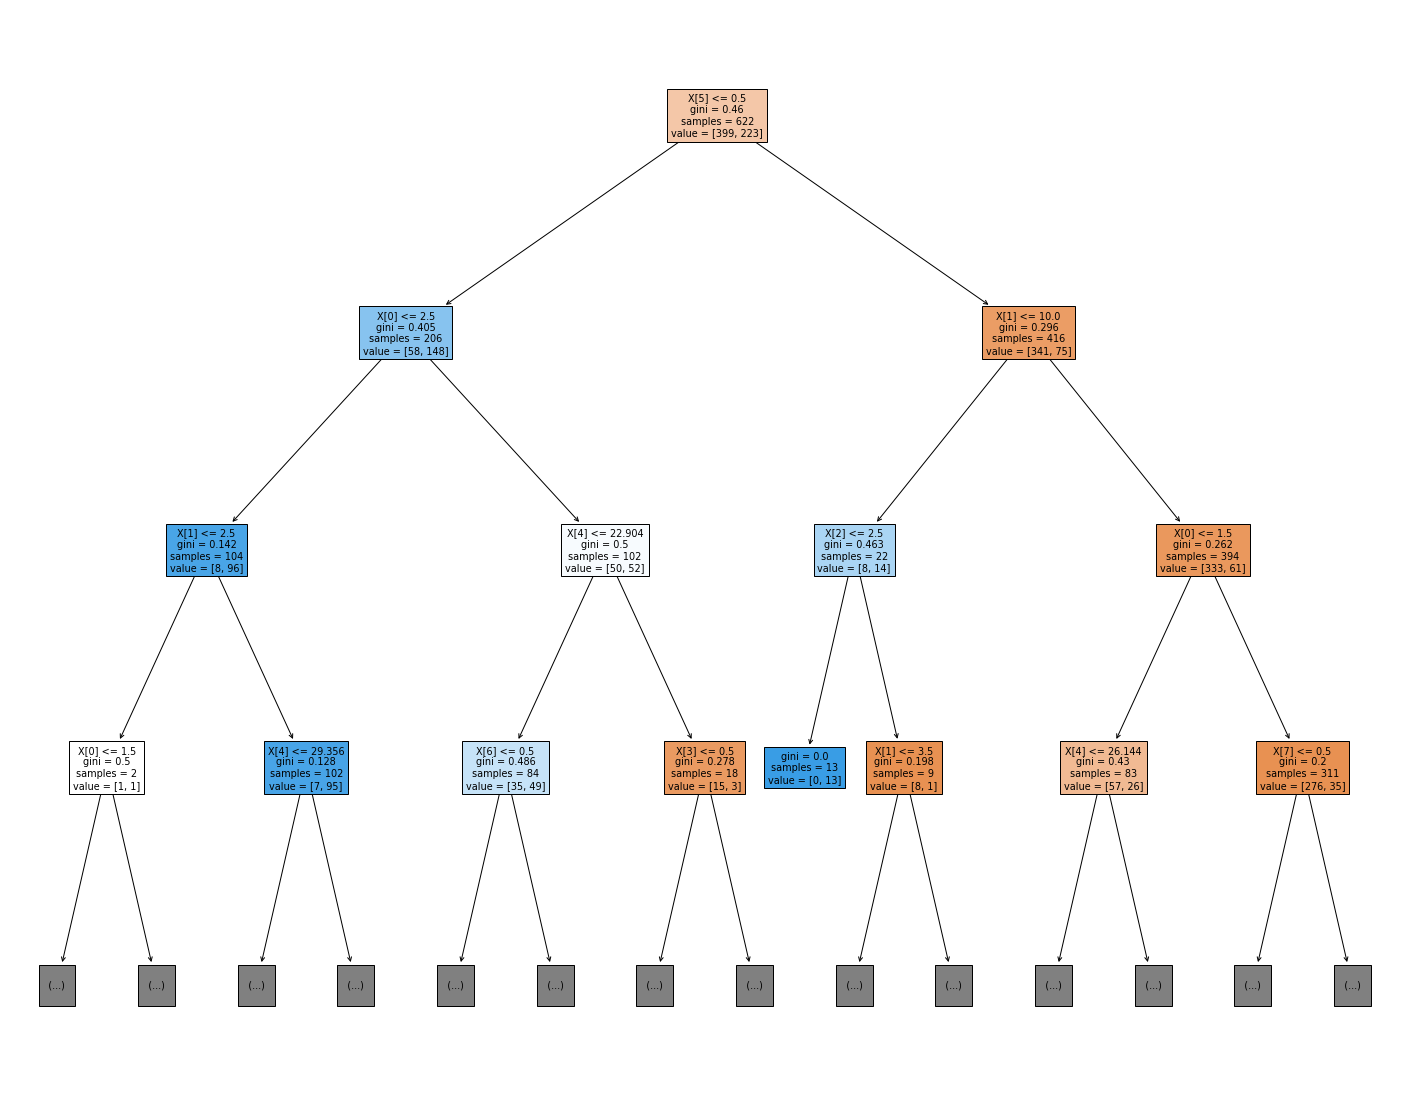

In [30]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTModel,
                   filled=True, max_depth=3)

# 1.4) Five-Fold cross validation on Decision tree

In [41]:
from sklearn.model_selection import cross_val_score
DTModel = DecisionTreeClassifier()
cross_val_score(DTModel,data.drop(['PassengerId','Survived'],axis=1),data['Survived'],cv=5).mean()

0.7716942804545166

# 1.5) Five-Fold cross validation on Random Forest 

In [32]:
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier()

In [46]:
cross_val_score(RF,data.drop(['PassengerId','Survived'],axis=1),data['Survived'],cv=5).mean()

0.8166825366596839

# 1.6) Which Algorithm is better?

### Answer) 
As comparing the cross validation score of both the classifiers, we can come to conclusion that Random Forest is better in comparison with Decision Tree.

# 1.7) Observation and conclusions

i) It is observed that Random Forest classifier performs better than Decision Tree Classifier